# Chess Game - AI Test Project

This notebook will be a playground to build a self-learning artificial intelligent (AI) agent to play the game of chess, and eventually beat its creator(s).  A simple reinforment learning approach will be explored

PyPi: https://pypi.python.org/pypi/python-chess

Docs: https://python-chess.readthedocs.io/en/v0.17.0/

In [1]:
import chess
import random
import time

import pandas as pd

## Show a simple ASCII board

Notice the lower case and upper case chars to represent the various sides of the game

In [2]:
board = chess.Board()

In [3]:
print(board)

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


## Show a simple UI board

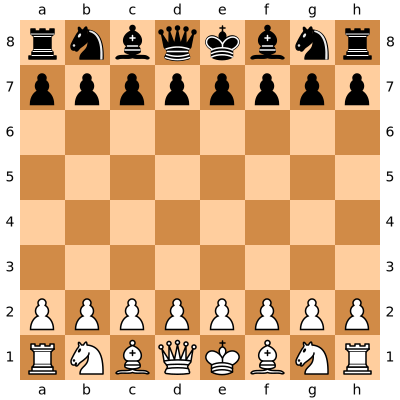

In [4]:
board

## Who's turn is it?

In [5]:
chess.WHITE

True

In [6]:
chess.BLACK

False

## Detect Checkmates, Stalemates and Draws

In [7]:
board.is_game_over()

False

In [8]:
board.is_checkmate()

False

In [9]:
board.is_stalemate()

False

In [10]:
board.is_insufficient_material()

False

In [11]:
board.is_check()

False

## Show legal moves

Research this further to see what limitations, if any, there are.

In [12]:
board.legal_moves

<LegalMoveGenerator at 0x223b033b4e0 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>

## Automated New Game

In [13]:
# Define piece values
v = {'K': 1000, 'Q': 100, 'B': 5, 'N': 5, 'R': 5, 'P': 1}

In [14]:
def get_pieces(board):
    '''
    Returns chess pieces currently on board. Separates white and black pieces into lists.
    
    Returns list[] = [[black_pieces], [white_pieces]]
    '''
    board_list = str(board)
    pieces = []
    b_pieces = []
    w_pieces = []
    
    for char in board_list:
        if char.islower():  #black player pieces are lowercase
            b_pieces.append(char)
        elif char.isupper():  #white player pieces are Uppercase
            w_pieces.append(char)
            
    pieces = [b_pieces, w_pieces]
    return pieces

In [15]:
def get_cur_reward(piece_list, piece_val_dict):
    '''
    Returns current reward value for each player.
    
    Returns list = [black_score(int), white_score(int)]
    '''
    b_score = 0
    w_score = 0
    
    # get score for black pieces
    for p in piece_list[0]:
        b_score = b_score + v[p.upper()]
    
    # get score for white pieces
    for p in piece_list[1]:
        w_score = w_score + v[p] #already uppercase
        
    return [b_score, w_score]

Move Number: 0
[1138, 1138]
Player Action: e2e3
b_score 1138 w_score 1138
Move Number: 1
[1138, 1138]
Player Action: g7g5
b_score 1138 w_score 1138
Move Number: 2
[1138, 1138]
Player Action: f1d3
b_score 1138 w_score 1138
Move Number: 3
[1138, 1138]
Player Action: c7c5
b_score 1138 w_score 1138
Move Number: 4
[1138, 1138]
Player Action: d3f1
b_score 1138 w_score 1138
Move Number: 5
[1138, 1138]
Player Action: d8c7
b_score 1138 w_score 1138
Move Number: 6
[1138, 1138]
Player Action: g1e2
b_score 1138 w_score 1138
Move Number: 7
[1138, 1138]
Player Action: d7d6
b_score 1138 w_score 1138
Move Number: 8
[1138, 1138]
Player Action: b2b4
b_score 1138 w_score 1138
Move Number: 9
[1138, 1138]
Player Action: f7f6
b_score 1138 w_score 1138
Move Number: 10
[1138, 1138]
Player Action: c2c4
b_score 1138 w_score 1138
Move Number: 11
[1138, 1138]
Player Action: c8f5
b_score 1138 w_score 1138
Move Number: 12
[1138, 1138]
Player Action: c1a3
b_score 1138 w_score 1138
Move Number: 13
[1138, 1138]
Player

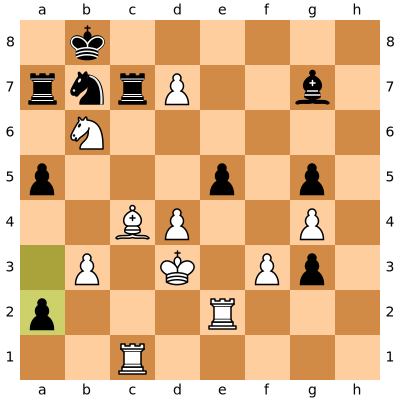

In [16]:
board = chess.Board()

num_moves = 100

for i in range(0, num_moves):
    print('Move Number:', i)

    # get current actions
    a = list(board.legal_moves)
    #print(a)
    
    # get current pieces
    p = get_pieces(board)
    #print(p)
    
    # get current reward
    r = get_cur_reward(p, v)
    print(r)
    
    # Choose random player move from current possibilities
    player_action = a[random.randrange(0, len(a))]
    
    board.push(player_action)
    
    
    print('Player Action:', player_action)
    print('b_score', r[0], 'w_score', r[1])
    
    if board.is_stalemate() or board.is_insufficient_material():
        print('STALEMATE!!!! Nobody Wins, but you are still alive!')
        
    if board.is_game_over():
        print('GAME OVER!!!')
        break

        
board

In [17]:
help(pd)

Help on package pandas:

NAME
    pandas

DESCRIPTION
    pandas - a powerful data analysis and manipulation library for Python
    
    **pandas** is a Python package providing fast, flexible, and expressive data
    structures designed to make working with "relational" or "labeled" data both
    easy and intuitive. It aims to be the fundamental high-level building block for
    doing practical, **real world** data analysis in Python. Additionally, it has
    the broader goal of becoming **the most powerful and flexible open source data
    analysis / manipulation tool available in any language**. It is already well on
    its way toward this goal.
    
    Main Features
    -------------
    Here are just a few of the things that pandas does well:
    
      - Easy handling of missing data in floating point as well as non-floating
        point data
      - Size mutability: columns can be inserted and deleted from DataFrame and
        higher dimensional objects
      - Automatic and